# Part 1: Cleaning & EDA

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading

We have three datasets of sentences to use: one about gay rights, one about gun rights, and one containing restaurant reviews.

In [2]:
# Since there are no column labels, we have to set header=None so the first row is not treated as column names.
# See documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
gay = pd.read_csv('../data/GAY-SENTENCES.txt', sep='\t', header=None)

In [3]:
gay.head()

,0,1,2,3,4
0,1001,A12WI1MRO70881,[SHIFT]LET THERE BE OTHER FORMS OF ESTABLISHI...,"240,495,99,80,97,63,80,63,80,96,80,80,63,80,64...","240,495,99,80,97,63,80,63,80,96,80,80,63,80,64..."
1,1002,A12WI1MRO70881,[SHIFT]LET THERE BE T[BACK]LEGALY RECOGNIZED ...,"227,261,95,122,81,80,96,63,144,151,80,64,63,64...","227,261,95,122,81,80,96,63,144,151,80,64,63,64..."
2,1003,A12WI1MRO70881,[SHIFT]I REO[BACK]COGNIZE THAT NON¿TRAIDI[BAC...,"256,400,80,79,64,48,80,81,81,65,80,96,65,81,78...","256,400,80,79,64,48,80,81,81,65,80,96,65,81,78..."
3,1004,A12WI1MRO70881,[SHIFT]ITS AN [BACK]C[BACK]A CORE SOCIAL INST...,"240,192,79,79,82,80,79,79,80,415,64,61,97,80,8...","240,192,79,79,82,80,79,79,80,415,64,61,97,80,8..."
4,1005,A12WI1MRO70881,[SHIFT]ITS A CORE SOCIAL INSTITUTION THAT IS ...,"282,233,4,79,80,80,96,79,96,65,79,82,65,80,80,...","282,233,4,79,80,80,96,79,96,65,79,82,65,80,80,..."


In [4]:
# Column 4 is a duplicate of column 3
gay.drop(columns = 4, inplace = True)

In [5]:
gay.columns = ['sentence_id', 'user_id', 'sentence', 'type_time']

In [6]:
gay.head()

,sentence_id,user_id,sentence,type_time
0,1001,A12WI1MRO70881,[SHIFT]LET THERE BE OTHER FORMS OF ESTABLISHI...,"240,495,99,80,97,63,80,63,80,96,80,80,63,80,64..."
1,1002,A12WI1MRO70881,[SHIFT]LET THERE BE T[BACK]LEGALY RECOGNIZED ...,"227,261,95,122,81,80,96,63,144,151,80,64,63,64..."
2,1003,A12WI1MRO70881,[SHIFT]I REO[BACK]COGNIZE THAT NON¿TRAIDI[BAC...,"256,400,80,79,64,48,80,81,81,65,80,96,65,81,78..."
3,1004,A12WI1MRO70881,[SHIFT]ITS AN [BACK]C[BACK]A CORE SOCIAL INST...,"240,192,79,79,82,80,79,79,80,415,64,61,97,80,8..."
4,1005,A12WI1MRO70881,[SHIFT]ITS A CORE SOCIAL INSTITUTION THAT IS ...,"282,233,4,79,80,80,96,79,96,65,79,82,65,80,80,..."


In [7]:
# We can drop sentence_id as it is not relevant to our analysis
gay.drop(columns = 'sentence_id', inplace = True)

## Data Cleaning

In [8]:
# Check for any nulls
gay.isnull().sum()

user_id      0
sentence     0
type_time    0
dtype: int64

In [9]:
# This function adds up the speeds for each keystroke.
def total_time(string):
    typingSum = 0
    
    numberString = ""
    
    for i in range(len(string)):
        if string[i] == ',':
            typingSum += int(numberString)
            numberString = ""
        else:
            numberString = numberString + string[i]
            
            if i == len(string) - 1:
                typingSum += int(numberString)
            
    return typingSum

In [10]:
# Set speed to be equal to total speed
gay['type_time'] = gay['type_time'].map(lambda x: total_time(x))

In [11]:
gay.head()

,user_id,sentence,type_time
0,A12WI1MRO70881,[SHIFT]LET THERE BE OTHER FORMS OF ESTABLISHI...,43693
1,A12WI1MRO70881,[SHIFT]LET THERE BE T[BACK]LEGALY RECOGNIZED ...,34515
2,A12WI1MRO70881,[SHIFT]I REO[BACK]COGNIZE THAT NON¿TRAIDI[BAC...,23272
3,A12WI1MRO70881,[SHIFT]ITS AN [BACK]C[BACK]A CORE SOCIAL INST...,15389
4,A12WI1MRO70881,[SHIFT]ITS A CORE SOCIAL INSTITUTION THAT IS ...,14949


In [12]:
# Total number of function keys
gay['function_keys'] = gay['sentence'].map(lambda x: sum([1 for char in x if char == '[']))

In [13]:
# This function removes function keys such as shift and backspace from the sentence data
def real_sentence(string):
    realString = ""
    i = 0
    
    while i < len(string):
        if string[i] == '[':
            if string[i+1:i+6] == 'BACK]':
                # Remove last character if backspace key is encountered
                realString = realString[0:len(realString) - 1]
                i += 6
            else:
                # Loop until function key is finished
                while i < len(string):
                    if string[i] == ']':
                        i += 1
                        break
                    i += 1
        else:
            realString += string[i]
            i += 1
            
    return realString

In [14]:
gay['sentence'] = gay['sentence'].map(lambda x: real_sentence(x))

In [15]:
gay.head()

,user_id,sentence,type_time,function_keys
0,A12WI1MRO70881,LET THERE BE OTHER FORMS OF ESTABLISHINA DOME...,43693,22
1,A12WI1MRO70881,LET THERE BE LEGALY RECOGNIZED DOMSESTIC PART...,34515,11
2,A12WI1MRO70881,I RECOGNIZE THAT NON¿TRAIDDITIONAL PARTNERSHI...,23272,15
3,A12WI1MRO70881,ITS ANA CORE SOCIAL INSTITUTION THAT IS UNDER...,15389,4
4,A12WI1MRO70881,ITS A CORE SOCIAL INSTITUTION THAT IS UNDER A...,14949,3


In [16]:
# Check if user_id and sentence are objects and speed is an int
gay.dtypes

user_id          object
sentence         object
type_time         int64
function_keys     int64
dtype: object

In [17]:
# Create a column for topic of the dataset the sentence came from
gay['topic'] = 'gay'
gay.head()

,user_id,sentence,type_time,function_keys,topic
0,A12WI1MRO70881,LET THERE BE OTHER FORMS OF ESTABLISHINA DOME...,43693,22,gay
1,A12WI1MRO70881,LET THERE BE LEGALY RECOGNIZED DOMSESTIC PART...,34515,11,gay
2,A12WI1MRO70881,I RECOGNIZE THAT NON¿TRAIDDITIONAL PARTNERSHI...,23272,15,gay
3,A12WI1MRO70881,ITS ANA CORE SOCIAL INSTITUTION THAT IS UNDER...,15389,4,gay
4,A12WI1MRO70881,ITS A CORE SOCIAL INSTITUTION THAT IS UNDER A...,14949,3,gay


In [18]:
# Do the same cleaning for the gun rights and review datasets as for the gay rights dataset
gun = pd.read_csv('../data/GUN-SENTENCES.txt', sep='\t', header=None)
gun.drop(columns = [0, 4], inplace = True)
gun.columns = ['user_id', 'sentence', 'type_time']

In [19]:
gun.isnull().sum()

user_id      0
sentence     0
type_time    0
dtype: int64

In [20]:
gun['type_time'] = gun['type_time'].map(lambda x: total_time(x))
gun['function_keys'] = gun['sentence'].map(lambda x: sum([1 for char in x if char == '[']))
gun['sentence'] = gun['sentence'].map(lambda x: real_sentence(x))
gun['topic'] = 'gun'

In [21]:
gun.head()

,user_id,sentence,type_time,function_keys,topic
0,A12WI1MRO70881,ANTOEROTHER REASON TO NOT TAKE AWAY GUNS IS T...,32273,6,gun
1,A12WI1MRO70881,", WHEREAS BEFORE THEY HAD TOCRIMINLALS WERE OU...",26831,11,gun
2,A12WI1MRO70881,"BY IMPOSING GUN CONTROL, WE TAKE AWAY THE SAF...",22400,6,gun
3,A12WI1MRO70881,"FOR THESE COUPERESOASONS AND MORE, I BELIEVE ...",23105,6,gun
4,A12WI1MRO70881,"NBY IMPOSING GUN CONTROL, WE TAKE AWAY THE SA...",21881,3,gun


In [22]:
review = pd.read_csv('../data/REVIEW-SENTENCES.txt', sep='\t', header=None)
review.drop(columns = [0, 4], inplace = True)
review.columns = ['user_id', 'sentence', 'type_time']

In [23]:
review.isnull().sum()

user_id      0
sentence     0
type_time    0
dtype: int64

In [24]:
review['type_time'] = review['type_time'].map(lambda x: total_time(x))
review['function_keys'] = review['sentence'].map(lambda x: sum([1 for char in x if char == '[']))
review['sentence'] = review['sentence'].map(lambda x: real_sentence(x))
review['topic'] = 'review'

In [25]:
review.head()

,user_id,sentence,type_time,function_keys,topic
0,A12WI1MRO70881,THE STAF AT ORIRININAL GINAL SHRIMP PLACE IS ...,21052,12,review
1,A12WI1MRO70881,THE INSIDE IS A VERY NCIICEE PLACE FROR THOSE...,19918,11,review
2,A12WI1MRO70881,THTTHE WAITERS ARE ALSO VERY KNOWLEDGEABLE AB...,17245,13,review
3,A12WI1MRO70881,THE STAF AT ORIGINAL SHRIMP PLACE IS ALSO VER...,16987,10,review
4,A12WI1MRO70881,ALTHOUGH THEY DO SEL OTHER FOD TITEMS THAT AR...,18196,10,review


In [26]:
# Combine all sentences into one dataframe
data = gay
data = data.append(gun)
data = data.append(review)

In [27]:
data['length'] = data['sentence'].map(lambda x: len(x))

In [28]:
data.head()

,user_id,sentence,type_time,function_keys,topic,length
0,A12WI1MRO70881,LET THERE BE OTHER FORMS OF ESTABLISHINA DOME...,43693,22,gay,406
1,A12WI1MRO70881,LET THERE BE LEGALY RECOGNIZED DOMSESTIC PART...,34515,11,gay,387
2,A12WI1MRO70881,I RECOGNIZE THAT NON¿TRAIDDITIONAL PARTNERSHI...,23272,15,gay,182
3,A12WI1MRO70881,ITS ANA CORE SOCIAL INSTITUTION THAT IS UNDER...,15389,4,gay,179
4,A12WI1MRO70881,ITS A CORE SOCIAL INSTITUTION THAT IS UNDER A...,14949,3,gay,177


## Data Analysis

In [29]:
data.shape

(32716, 6)

In [30]:
# Check how balanced the dataset is in terms of topic
data['topic'].value_counts()

review    13319
gun       11534
gay        7863
Name: topic, dtype: int64

The dataset is rather well-balanced between the three topics.

Text(0.5, 1.0, 'Distribution of Sentence Typing Times')

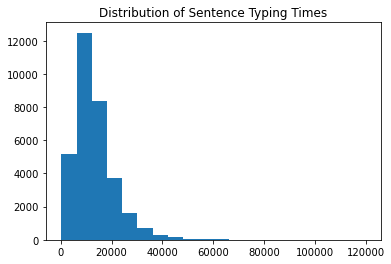

In [31]:
# Check the distribution of speeds
plt.hist(data['type_time'], bins=20)
plt.title("Distribution of Sentence Typing Times")

In [32]:
data['type_time'].describe()

count     32716.000000
mean      13239.110588
std        8183.447503
min         193.000000
25%        7631.750000
50%       11493.500000
75%       16742.250000
max      120051.000000
Name: type_time, dtype: float64

In [33]:
# 10 sentences that took shortest time to type
data.sort_values(by='type_time').head(10)

,user_id,sentence,type_time,function_keys,topic,length
4381,A37LY5UTJV2KYZ,I WAS VERY WRONG.,193,0,review,18
401,A1OYFC4BCV2AJ4,GIVE THEM A SHOT.,198,0,review,18
9368,A1L7G3CXAMZ0TK,THEREFORE GUN CONTROL IS UTERLY USELES.,199,1,gun,40
4380,A37LY5UTJV2KYZ,THE PRICES ARE RIGHT.,238,0,review,22
11326,AQOACE1A37PIK,THEY REPRESENT WHAT WE WERE FOUNDED ON.,265,0,gun,40
2783,A3UEFIZ8PF8281,YOU ARE NOT ALONE.,277,0,gay,19
9179,A19C4VNUIIRCPD,GUN CONTROL STARTS AT HOME.,287,0,gun,27
9366,A1L7G3CXAMZ0TK,I BELIEVE IN THE RIGHT OF EVERY US CITIZEN TO ...,290,3,gun,56
11325,AQOACE1A37PIK,THEY REPRESENT WHA WE WERET FOUNDED ON.,290,1,gun,40
5849,A1Q4PWSHDWPH1Q,CUSTOMER SERVICE WAS AMAZING.,296,0,review,30


In [34]:
# 10 sentences that took longest time to type
data.sort_values(by='type_time', ascending=False).head(10)

,user_id,sentence,type_time,function_keys,topic,length
582,A1XC59S9X41ZHO,IF ONE SUPORTS GAY RIGHTTHE RIGHTS OF GAY PEO...,120051,36,gay,637
4815,A3TM7MRDB2KEPH,THE RECOGNITION OF IF TWO MEN CAN MARY EACH OT...,111245,39,gay,568
5773,A1M907BJPOLBU1,THE ARGUMENTS THATTHAT CURENTLY SOPSCURENTLY ...,94351,31,gay,509
9228,A1GFLU1X1ZIIRI,", AND TAKE RESPONSIBOLITYAGAGRE TO TAKE RESPON...",85129,45,gun,451
9413,A1RJIYXSI5QAHH,IT IS ALSO GIVING UPA HUGEO OUR L IT IS OUR L...,83063,58,gun,396
3684,A2HR27LMSYOEH3,I PREFER THEIR GREAT WHGREAT WHITE BITES AND ...,83031,42,review,429
5331,A3U68JIBPQVMSL,SO ARE WE REALYLY WILING TO RISK OPENING THED...,80276,35,gun,419
4816,A3TM7MRDB2KEPH,"IFF TWO MEN CAN MARY EACH OTHER, WHY NOT FIVE...",77263,21,gay,462
1776,A3I9PEFJ88TUFN,""" BY GRANTING TGAYS, THE RIGHT TO THE SAME TRE...",76793,28,gay,487
8621,AS21DAOA4V0SG,HAHNDGUNS NED BETECONTINUE IMPROVHANDGUNVIOLE...,74916,58,gun,450


In [35]:
# 10 longest sentences by number of characters
data.sort_values(by='length', ascending=False).head(10)

,user_id,sentence,type_time,function_keys,topic,length
12697,ARYH49BS0B1RS,"VIVILA MOSCONI IS IN BEAUTIFUL, ECLECTICLECTIC...",18699,73,review,6291
4166,A3554U8JNGM904,WE DO NOT WANT TO SOUR CHILDREN OTO SE SUCH A...,14230,31,gay,5446
279,A1HK2QWRGZT46N,¿I¿N ORDER TO PREACH TO OTHER COUNTRIES THAT ...,18123,13,gay,2721
1111,A2E0Y8VVC4TQA9,THE RIGHT TO BEAR ARMS IS IMPORTANT FOR HOME ...,29528,21,gun,2508
7046,A2I4A4WGWII18Z,KEPING THE GOVERNMENT OUT OF MY OEPERSONAL RI...,16994,19,gun,1950
9467,A1S873CM6A3XXA,I ¿BELIEVE THAT WE SHOULD NEVER HAVNOT HAVE GU...,70586,13,gun,673
9468,A1S873CM6A3XXA,¿I¿ BELIEVE THAT WE SHOULD NOT HAVE GUN CONTRO...,68562,11,gun,667
2262,A3QAIABUJV1GAO,¿COUNTLES LIVES HAVE BEN LOSINOCENT LIVES HAV...,72670,20,gun,637
582,A1XC59S9X41ZHO,IF ONE SUPORTS GAY RIGHTTHE RIGHTS OF GAY PEO...,120051,36,gay,637
6223,A1M907BJPOLBU1,¿I¿ SUPORT GUN CTRONTROL BECAUSEF NUMEROUS REA...,67036,18,gun,607


We should remove the length outliers from the data but not the typing time outliers.

In [36]:
data = data[data['length'] < 700]

Text(0, 0.5, 'Time to Type Sentence')

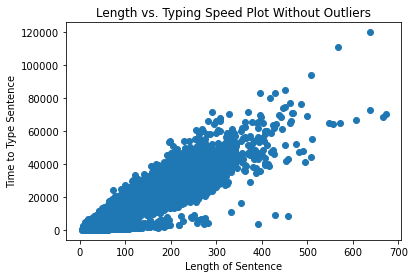

In [37]:
plt.scatter(data['length'], data['type_time'])
plt.title('Length vs. Typing Speed Plot Without Outliers')
plt.xlabel('Length of Sentence')
plt.ylabel('Time to Type Sentence')

In [38]:
data.to_csv('../data/data_cleaned.csv', index=False)